1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.interpolate import interp1d
from scipy.stats import gamma
import pandas as pd
from scipy import stats
import math

In [11]:
def prob_func(t, tau):
    return 1 - 2**(-t/tau)

tau = 3.052 * 60 #make to seconds 
N = 1000
pb = 0
time = 300

time_steps = np.arange(0, time + 1, 1)
    
T_evolution = [N]
pb_evolution = [pb]
    
for t in time_steps[1:]:
    decay_prob = prob_func(t, tau)
    decayed_tl = np.random.binomial(N, decay_prob)
        
    N -= decayed_tl
    pb += decayed_tl
        
    T_evolution.append(N)
    pb_evolution.append(pb)

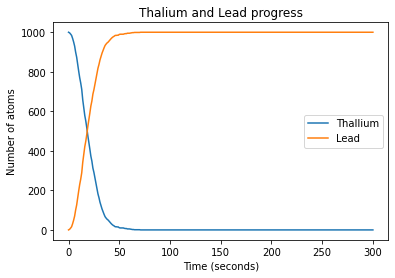

In [12]:
# Plot the results
plt.plot(time_steps, T_evolution, label='Thallium')
plt.plot(time_steps, pb_evolution, label='Lead')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms')
plt.legend()
plt.title('Thalium and Lead progress')
plt.show()

In [ ]:
# model based on know part and stocastic part 
# It follows exponential distribution 

The inverse of the probabilty function can be found as 
$$ P^{-1}(x) = -\tau * log(1-n) $$ 

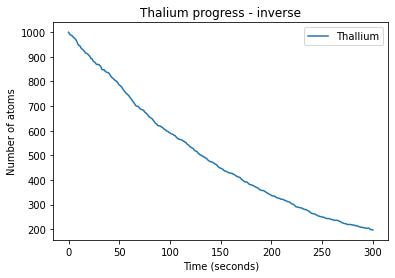

In [13]:
def inv_log_ex(n, tau):
    return - tau * np.log(1 - n)

T_atom = []
n = np.random.rand(1000)
decay_prob = inv_log_ex(np.sort(n),tau)

for i, t in enumerate(time_steps):
    T_atom.append(np.sum(decay_prob > t))

plt.plot(time_steps, T_atom, label='Thallium')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms')
plt.legend()
plt.title('Thalium progress - inverse')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

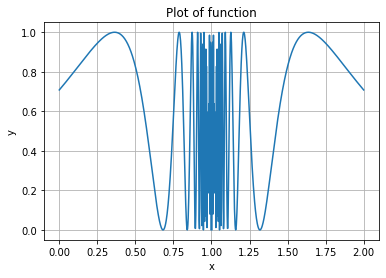

In [16]:
def func1(x):
    return np.sin(1/(1-x))**2

N = 1000
x = np.linspace(0,2,N)
y = func1(x)

plt.plot(x, y)
plt.title('Plot of function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [17]:
np.max(y)

0.999994085292026

In [25]:
# a and b is the integration interval [0,2]
# h is the height, value bigger than max(f(x)), which is 0.99
a, b, h = 0, 2, 2

count = 0
for i in range(N):
    x = h * np.random.random()
    y = (b - a) * np.random.random()
    if y < func1(x): count += 1
I = count / N * h * (b - a)

print(I)


1.324


 Evaluation of error:

In [37]:
NN = 100 

integrals = []
for i in range(NN):
    x = h * np.random.random()
    y = (b - a) * np.random.random()
    if y < func1(x): count += 1
    integrals.append(count / N * h * (b - a))

integrals = np.array(integrals)
mu_int = np.mean(integrals)**2
mu_int_sq = np.mean(integrals**2)

#estimation of sigma^2 is <I^2>-<I>^2
sigma = np.sqrt(mu_int_sq - mu_int)
print("Integral: %.3f +- %.3f" % (I, sigma))
print('The error of the integral is quite small')

Integral: 1.324 +- 0.028


Mean value method

In [45]:
N = 300
a, b = 0, 1

def f(x):
    return 4.*math.sqrt(1 - x**2)
    
def mean_value(x_min, x_max, n):
    xi = np.random.uniform(x_min, x_max, n)
    yi = np.array([f(xii) for xii in xi])
    s = np.sum(yi)
    integ = (x_max - x_min) / n * s
    return integ

integr = mean_value(a, b, N)
print("Integral:", round(integral,3))

Integral: 3.13


In [57]:
M = 100

integrs = np.array([mean_value(a, b, N) for mi in np.arange(M)])

#estimation of sigma^2 is <I^2>-<I>^2
sigma = np.sqrt(np.mean(integrs**2) - np.mean(integrs)**2)

print("Integral: %.3f +- %.3f" % (integral, sigma))
print('As there are random numbers involved, it can be difficult to compare, since the numbers change.\nBut the tendency seems to be that the Mean Value method gives a higher error.')

Integral: 3.130 +- 0.053
As there are random numbers involved, it can be difficult to compare, since the numbers change.
But the tendency seems to be that the Mean Value method gives a higher error.


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [65]:
def func(x, y):
    res = x**2 + y**2
    if res <= 1: 
        f = 1
    else:
        f = 0
    return f

def mean_value(x_min, x_max, n):
    xi = np.random.uniform(x_min, x_max, n)
    yi = np.random.uniform(x_min, x_max, n)
    res = np.array([func(xii,yii) for xii, yii in zip(xi, yi)])
    s = np.sum(res)
    integ = (x_max - x_min) / n * s
    return integ

N = 1000
integral = mean_value(-1,1, N)
print('Integral:', integral)

Integral: 1.54


Generalized function and shown with a 10D sphere 

In [73]:
import numpy as np

def func(dim):
    res = sum(x**2 for x in dim)
    if res <= 1: 
        f = 1
    else:
        f = 0
    return f

def mean_value(x_min, x_max, n, dimensions):
    points = np.random.uniform(x_min, x_max, size=(n, dimensions))
    res = np.array([func(point) for point in points])
    s = np.sum(res)
    volume = (x_max - x_min)**dimensions
    integ = volume / n * s
    return integ

dimensions = 10
N = 1000
integral = mean_value(-1, 1, N, dimensions)
integral *= (2 ** dimensions)

print('Estimated Volume of 10D Sphere:', integral)


Estimated Volume of 10D Sphere: 1048.576


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [77]:
def w_func(r):
    return 1/np.sqrt(r)

def integ(x):
    return (x**(-1/2)/(exp**x + 1))

N =  10000

print('I do not understand how to solve this exercise..')

I do not understand how to solve this exercise..


In [15]:
#The accuracy is dependent on the number we use 